In [2]:
url_api="https://ressources.data.sncf.com/api/v2/catalog/datasets/regularite-mensuelle-ter/exports/json?limit=-1&offset=0&timezone=UTC"

In [3]:
import requests
import pandas as pd
#recupération des données de régularité via l'API SNCF 
req = requests.get(url_api)
wb = req.json()

# normalisation du fichier json
df = pd.json_normalize(wb)
print(df.shape)
df.sort_values(by='date').head(50) #inspection des 8 premières lignes


(1825, 9)


,date,region,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,commentaires
0,2013-01,Basse Normandie,3331.0,3297.0,34.0,311.0,90.567182,9.601286,Grand froid et épisode neigeux les semaines 3 ...
118,2013-01,Rhône Alpes,31438.0,30779.0,659.0,3552.0,88.459664,7.665259,None
116,2013-01,Provence Alpes Côte d'Azur,13956.0,13219.0,737.0,1816.0,86.262198,6.279185,None
114,2013-01,Midi Pyrénées,8208.0,7941.0,267.0,903.0,88.628636,7.794020,None
112,2013-01,Languedoc Roussillon,5024.0,4897.0,127.0,377.0,92.301409,11.989390,Chute de neige sur le littoral.
1199,2013-01,Poitou Charentes,3269.0,3134.0,135.0,205.0,93.458839,14.287805,Mouvements sociaux des agents du service comme...
1197,2013-01,Pays-de-la-Loire,10407.0,10195.0,212.0,713.0,93.006376,13.298738,None
506,2013-01,Alsace,20095.0,19874.0,221.0,897.0,95.486565,21.156076,Intempéries.
509,2013-01,Aquitaine,8099.0,8014.0,85.0,731.0,90.878463,9.963064,Intempéries à partir du 20 janvier.
512,2013-01,Auvergne,5785.0,5732.0,53.0,431.0,92.480809,12.299304,Conditions météos défavorables.


#**Description de la base**

Ce jeu de données porte sur la régularité des trains de la SNCF depuis janvier 2015 jusqu'au 28 octobre 2022. Il contient 1825 observations qui sont enrégistrées mensuellement et par région. Il contient 9 variables à savoir:

date	
region
nombre_de_trains_programmes
nombre_de_trains_ayant_circule
nombre_de_trains_annules
nombre_de_trains_en_retard_a_l_arrivee
taux_de_regularite	nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee
commentaires


#**Analyse de la qualité de base en vue du traitement des données**


In [4]:
#Type des variables
df.dtypes # print pour observer 

date                                                               object
region                                                             object
nombre_de_trains_programmes                                       float64
nombre_de_trains_ayant_circule                                    float64
nombre_de_trains_annules                                          float64
nombre_de_trains_en_retard_a_l_arrivee                            float64
taux_de_regularite                                                float64
nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee    float64
commentaires                                                       object
dtype: object

In [5]:
#quelques statistiques sur les variables quantitatives
df.describe()

,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee
count,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000
mean,12292.477629,12039.897651,258.276846,1011.242729,91.574464,13.044802
std,9015.810259,8818.687906,291.916890,837.461109,3.420634,6.218286
min,1129.000000,1125.000000,4.000000,35.000000,74.365711,2.901025
25%,5901.500000,5825.750000,83.000000,421.000000,89.670614,8.681130
50%,9474.000000,9263.500000,157.000000,729.500000,92.017786,11.527859
75%,14888.000000,14406.500000,333.000000,1239.500000,94.124250,16.019116
max,46329.000000,45569.000000,4024.000000,4576.000000,98.026494,49.671233


In [6]:
#Donnnées manquantes
df.isnull().sum()

date                                                                0
region                                                              0
nombre_de_trains_programmes                                        37
nombre_de_trains_ayant_circule                                     37
nombre_de_trains_annules                                           37
nombre_de_trains_en_retard_a_l_arrivee                             37
taux_de_regularite                                                 37
nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee     37
commentaires                                                      899
dtype: int64

In [7]:
#Identification des régions présentes dans la base
list_regions=df['region'].unique()  #list des régions sous forme numpy.ndarray
print(len(list_regions))
print(list_regions)
#Nombre d'année couvert par la base
list_annee=df['date'].unique()  #list des années sous forme numpy.ndarray
print(len(list_annee))
print(list_annee)

28
['Basse Normandie' 'Champagne Ardenne' 'Lorraine' 'Aquitaine'
 'Nord Pas de Calais' 'Rhône Alpes' 'Alsace' 'Picardie' 'Franche Comté'
 'Midi Pyrénées' 'Bourgogne' 'Bretagne' 'Limousin' 'Pays-de-la-Loire'
 'Languedoc Roussillon' 'Auvergne' 'Haute Normandie' 'Poitou Charentes'
 'Centre' "Provence Alpes Côte d'Azur" 'Grand Est' 'Hauts-de-France'
 'Normandie' 'Occitanie' 'Bourgogne-Franche-Comté' 'Auvergne-Rhône-Alpes'
 'Centre Val-de-Loire' 'Nouvelle Aquitaine']
119
['2013-01' '2013-02' '2013-03' '2013-04' '2013-05' '2013-06' '2013-07'
 '2013-08' '2013-09' '2013-10' '2013-11' '2013-12' '2014-01' '2014-02'
 '2014-03' '2014-04' '2014-05' '2014-06' '2014-07' '2014-08' '2014-09'
 '2014-10' '2014-11' '2014-12' '2015-01' '2015-02' '2015-03' '2015-04'
 '2015-05' '2015-06' '2015-07' '2015-08' '2015-09' '2015-10' '2015-11'
 '2015-12' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05' '2016-06'
 '2016-07' '2016-08' '2016-09' '2016-10' '2016-11' '2016-12' '2017-01'
 '2017-02' '2017-03' '2017-04' '

On remarque qu'il ya 28 régions présentes tandis que la france compte actuellement et officiellement 12 régions. Le problème se trouve au niveau de l'évolution du découpage administratif de 2013 à 2022. En effet, une reforme du découpage des régions a eu lieu en France lors de l'année 2014. Plusieurs régions ont été fusionnées si on peut le dire ainsi.


In [8]:
#Identification des région avec le plus de valeur NAN
df_na=df[df['nombre_de_trains_programmes'].isnull()==1]
print(df_na.shape)
print(df_na['region'].unique())
df_na.head(37)
print(df_na['commentaires'].unique())

(37, 9)
['Lorraine' 'Nord Pas de Calais']
["Le Président de la Région Lorraine s'est opposé, par courrier du 10 juillet 2013, à ce que SNCF transmette à l'AQST les données relatives aux trains TER lorrains en retard ou annulés, au motif qu'il n'a pas ''de visibilité sur les capacités des régions à poursuivre leurs missions d'autorité organisatrice des transports régionaux''."
 None]


In [9]:
df_na.sort_values(by='date').head(37)

,date,region,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,commentaires
2,2013-01,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
130,2013-02,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
1217,2013-03,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
1227,2013-04,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
1091,2013-05,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
21,2013-06,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
1111,2013-07,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
1118,2013-08,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
596,2013-09,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
36,2013-10,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...


In [10]:
#suppression des lignes avec des valeurs manquantes


le nombre de manquant dans la base corresponde tous à des valeurs pour les régions 'Lorraine' et 'Nord Pas de Calais'. La raison pour les manquants de loraines se trouves dans les commentaires. On remarque que l'indisponibilité des données données ter de la lorraine couvrent les 3 premières années de la base 2013,2014 et 2015.

In [11]:
df['date']=pd.to_datetime(df['date'])
print(type(df['date'][0]))
print(df['date'][0])
df['annee'] = df['date'].dt.year 
df['mois'] = df['date'].dt.month 
#df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2013-01-01 00:00:00


In [12]:
def evo_region (i):
    df_i=df[df['annee']==i]
    return df_i

In [13]:
list_annee=df['annee'].unique()
for i in list_annee :
    df_i=evo_region(i)
    print("le nombre de région à l'année ",i," est ",len(df_i['region'].unique()))

le nombre de région à l'année  2013  est  20
le nombre de région à l'année  2014  est  20
le nombre de région à l'année  2015  est  20
le nombre de région à l'année  2016  est  20
le nombre de région à l'année  2017  est  18
le nombre de région à l'année  2018  est  12
le nombre de région à l'année  2019  est  11
le nombre de région à l'année  2020  est  13
le nombre de région à l'année  2021  est  11
le nombre de région à l'année  2022  est  11


In [14]:
list_annee=df['annee'].unique()
for i in list_annee :
    df_i=evo_region(i)
    df_i=df_i.sort_values(by="region")
    print("les regions sont :", df_i['region'].unique())

les regions sont : ['Alsace' 'Aquitaine' 'Auvergne' 'Basse Normandie' 'Bourgogne' 'Bretagne'
 'Centre' 'Champagne Ardenne' 'Franche Comté' 'Haute Normandie'
 'Languedoc Roussillon' 'Limousin' 'Lorraine' 'Midi Pyrénées'
 'Nord Pas de Calais' 'Pays-de-la-Loire' 'Picardie' 'Poitou Charentes'
 "Provence Alpes Côte d'Azur" 'Rhône Alpes']
les regions sont : ['Alsace' 'Aquitaine' 'Auvergne' 'Basse Normandie' 'Bourgogne' 'Bretagne'
 'Centre' 'Champagne Ardenne' 'Franche Comté' 'Haute Normandie'
 'Languedoc Roussillon' 'Limousin' 'Lorraine' 'Midi Pyrénées'
 'Nord Pas de Calais' 'Pays-de-la-Loire' 'Picardie' 'Poitou Charentes'
 "Provence Alpes Côte d'Azur" 'Rhône Alpes']
les regions sont : ['Alsace' 'Aquitaine' 'Auvergne' 'Basse Normandie' 'Bourgogne' 'Bretagne'
 'Centre' 'Champagne Ardenne' 'Franche Comté' 'Haute Normandie'
 'Languedoc Roussillon' 'Limousin' 'Lorraine' 'Midi Pyrénées'
 'Nord Pas de Calais' 'Pays-de-la-Loire' 'Picardie' 'Poitou Charentes'
 "Provence Alpes Côte d'Azur" 'Rhône Alp

il devrait y avoir normalement 11 régions (12 en excluant la région d'ile de France non pris en compte pour les TER) à partir de l'annnée 2015

# ENFIN Partie analyse


1.taux de regularite par région

In [15]:
!pip install matplotlib

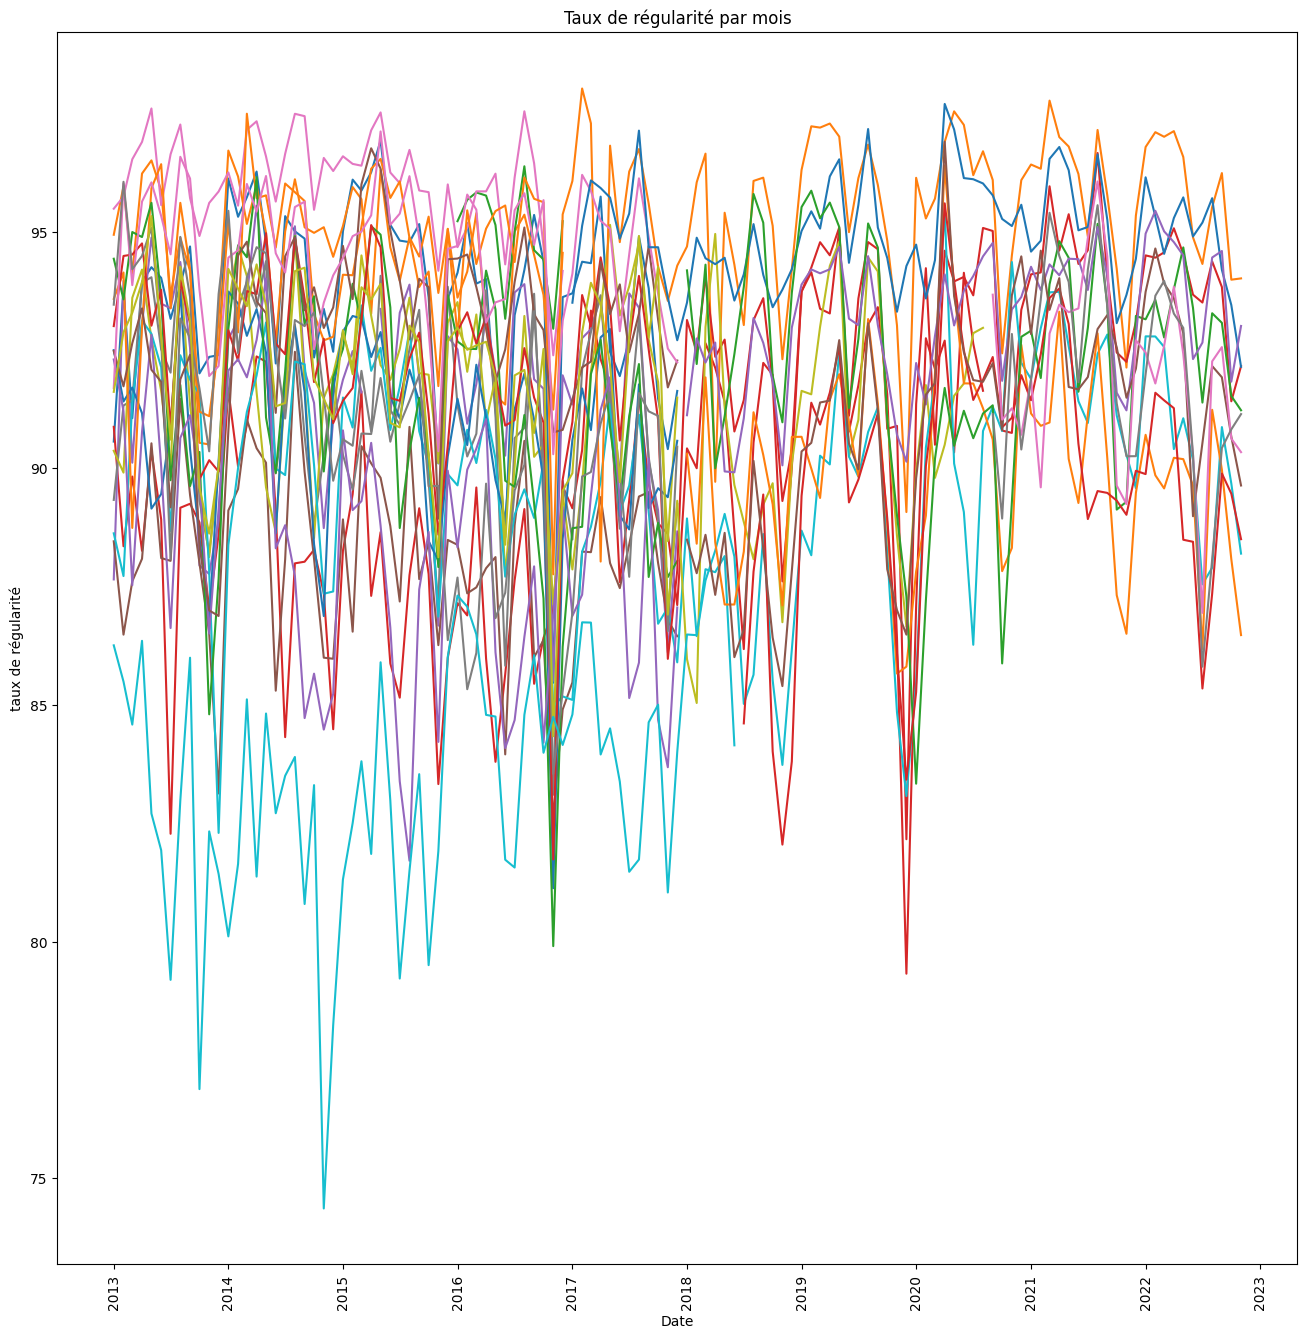

In [16]:
import matplotlib
from matplotlib import pyplot

for i in list_regions:
    df_region_i=df[df['region']==i]
    df_region_i=df_region_i.sort_values(by='date')


    matplotlib.pyplot.rcParams["figure.figsize"] = [16.0, 16.0]
    matplotlib.pyplot.title('Taux de régularité par mois')
    matplotlib.pyplot.xlabel('Date')
    matplotlib.pyplot.ylabel('taux de régularité')
    matplotlib.pyplot.xticks(rotation=90)
    matplotlib.pyplot.plot(df_region_i.date,df_region_i.taux_de_regularite)